In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
data_Q4 = pd.read_csv('delivery_time (1).csv')
data_Q4

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [56]:
data_Q4.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [57]:
data_Q4.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [58]:
data_Q4=data_Q4.rename(columns={'Delivery Time':'dt','Sorting Time': 'st'})
data_Q4

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [59]:
data_Q4.columns

Index(['dt', 'st'], dtype='object')

In [60]:
data_Q4.describe()

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [61]:
data_Q4.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

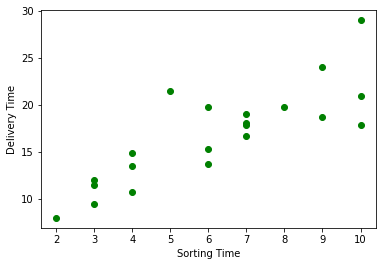

In [62]:
plt.scatter(x=data_Q4.st, y= data_Q4.dt, color='green')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
help(plt.plot)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f8f5ec5b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2f8f47c5220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f8f3b72f10>],
 'medians': [<matplotlib.lines.Line2D at 0x2f8f47c5670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f8f47c5190>],
 'means': []}

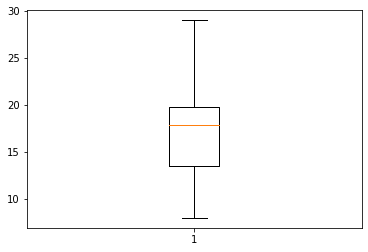

In [22]:
plt.boxplot(data_Q4.dt)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

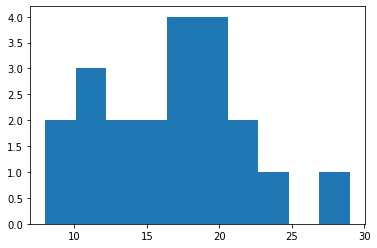

In [63]:
plt.hist(data_Q4.dt)

In [28]:
import statsmodels.formula.api as smf


In [29]:
model=smf.ols("dt~st",data=data_Q4).fit()

In [31]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [32]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        12:33:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model.conf_int(0.05) #95%confidence interval

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [67]:
pred =model.predict(data_Q4)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'Delivery time')

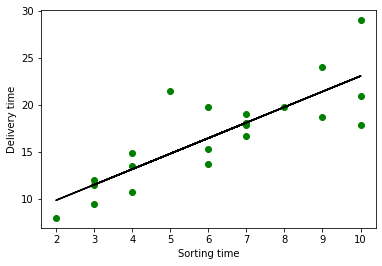

In [70]:
plt.scatter(x=data_Q4.st, y=data_Q4.dt, color='green')
plt.plot(data_Q4.st, pred,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [78]:
#log transformation

In [71]:
model2 =smf.ols("dt~np.log(st)",data=data_Q4).fit()

In [72]:
model2.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [73]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.64e-06
Time:                        13:55:25   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model2.conf_int(0.05) #95%confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [75]:
pred2=model2.predict(data_Q4)

In [76]:
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [47]:
rmse_log = np.sqrt(np.mean((np.array(data_Q4['dt']))-np.array(pred2))**2)

In [48]:
rmse_log

1.3534147347811431e-15

Text(0, 0.5, 'Delivery time')

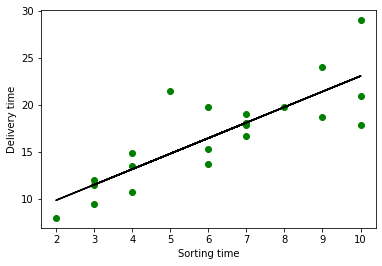

Text(0, 0.5, 'Delivery time')

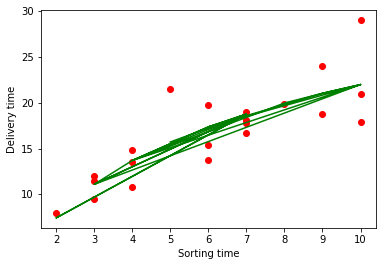

In [53]:
plt.scatter(x=data_Q4.st, y=data_Q4.dt, color='red')
plt.plot(data_Q4.st, pred2 ,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")